In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')
import warnings
warnings.filterwarnings('ignore')

In [13]:
datos = pd.read_csv('wine-clustering.csv')
datos.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
# Convertirmos a array para poder trabajarlo
wine_array = datos.values
wine_array

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

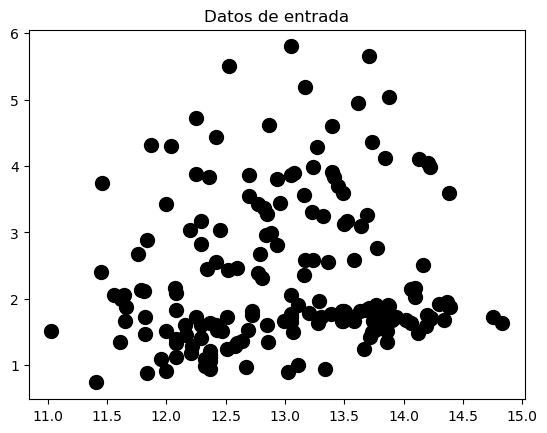

In [25]:
# Visualizacion de los puntos de la poblacion
plt.figure()
plt.title('Datos de entrada')
plt.scatter(wine_array[:,0], wine_array[:,1], marker = 'o', s = 100, color = 'black')

In [21]:
# Definir el numero de vecinos
k = 5
# Definir punto a relacionar
test_data = pd.DataFrame({
    'Alcohol': [14],'Malic_Acid': [2],'Ash': [2.5],'Ash_Alcanity': [16],'Magnesium': [115],
    'Total_Phenols': [3],'Flavanoids': [2.5],'Nonflavanoid_Phenols': [0.4],
    'Proanthocyanins': [2],'Color_Intensity': [9],'Hue': [1],'OD280': [3.5],'Proline': [800]
})
test = test_data.values
test

array([[1.40e+01, 2.00e+00, 2.50e+00, 1.60e+01, 1.15e+02, 3.00e+00,
        2.50e+00, 4.00e-01, 2.00e+00, 9.00e+00, 1.00e+00, 3.50e+00,
        8.00e+02]])

In [27]:
#Ejecucion del algoritmo KNN
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'auto').fit(wine_array)
distances, indices = knn_model.kneighbors(test)

In [43]:
vinos_parecidos = datos.iloc[indices[0]]
print(vinos_parecidos)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
40     13.56        1.71  2.31          16.2        117           3.15   
20     14.06        1.63  2.28          16.0        126           3.00   
25     13.05        2.05  3.22          25.0        124           2.63   
21     12.93        3.80  2.65          18.6        102           2.41   
141    13.36        2.56  2.35          20.0         89           1.40   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
40         3.29                  0.34             2.34             6.13  0.95   
20         3.17                  0.24             2.10             5.65  1.09   
25         2.68                  0.47             1.92             3.58  1.13   
21         2.41                  0.25             1.98             4.50  1.03   
141        0.50                  0.37             0.64             5.60  0.70   

     OD280  Proline  
40    3.38      795  
20    3.71      780  
25

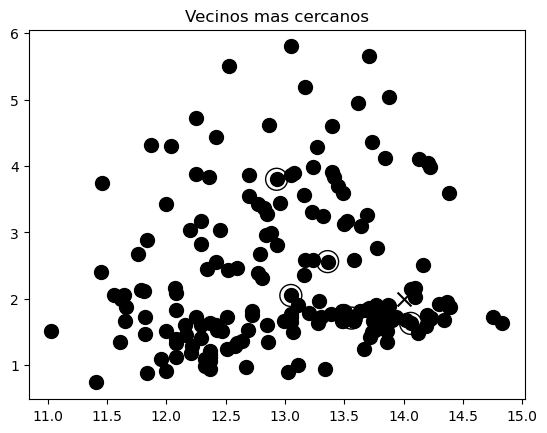

In [47]:
# Visualizacion de puntos asociados al punto de interes
plt.figure()
plt.title('Vecinos mas cercanos')
plt.scatter(wine_array[:,0], wine_array[:,1], marker = 'o', s = 100, color = 'black')
plt.scatter(wine_array[indices][0][:][:,0], wine_array[indices][0][:][:,1], marker = 'o', s = 250, color = 'black', facecolors = 'none')
plt.scatter(test[0, 0], test[0, 1], marker = 'x', s = 100, color = 'black')
plt.show()

# Conlcusion
En este caso pudimos encontrar 5 Vinos que son bastante parecidos al que tenemos como muestra, y las concentraciones de alcohol son las siguientes: Vino #40: 13.56, Vino #20: 14.06, Vino #25: 13.05, Vino #21: 12.93, Vino #141: 13.36.

# Problema # 2

In [26]:
from mlxtend.frequent_patterns import apriori, association_rules

my_basket = [['bread', 'butter', 'wine', 'bananas', 'coffee', 'carrots'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['beer', 'chips', 'asparagus', 'salsa', 'milk', 'apples'],
    ['olive oil', 'bread', 'butter', 'tomatoes', 'steak', 'carrots'],
    ['tomatoes', 'onions', 'chips', 'wine', 'ketchup', 'orange juice'],
    ['bread', 'butter', 'beer', 'chips', 'milk'],
    ['butter', 'tomatoes', 'carrots', 'coffee', 'sugar'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['bread', 'butter', 'ketchup', 'coffee', 'chicken wings'],
    ['butter', 'beer', 'chips', 'asparagus', 'apples'],
    ['tomatoes', 'onions', 'beer', 'chips', 'milk', 'coffee']]

In [28]:
# Obtener artículos únicos
articulos = sorted(set(item for basket in my_basket for item in basket))

In [30]:
canasta = []
for basket in my_basket:
    basket_dict = {item: (item in basket) for item in articulos}
    canasta.append(basket_dict)

In [32]:
df_basket = pd.DataFrame(canasta).astype(int)

In [34]:
# Apriori
frecuencia = apriori(df_basket, min_support=0.3, use_colnames=True)

print(frecuencia)

     support            itemsets
0   0.363636              (beer)
1   0.363636             (bread)
2   0.545455            (butter)
3   0.454545             (chips)
4   0.363636            (coffee)
5   0.454545              (milk)
6   0.363636            (onions)
7   0.545455          (tomatoes)
8   0.363636       (beer, chips)
9   0.363636     (bread, butter)
10  0.363636  (onions, tomatoes)


C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [36]:
association_rules(frecuencia, metric = 'confidence',
                  min_threshold = 0.5).sort_values('confidence', ascending = False).reset_index(drop = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beer),(chips),0.363636,0.454545,0.363636,1.000000,2.200000,1.0,0.198347,inf,0.857143,0.800000,1.000000,0.900000
1,(bread),(butter),0.363636,0.545455,0.363636,1.000000,1.833333,1.0,0.165289,inf,0.714286,0.666667,1.000000,0.833333
2,(onions),(tomatoes),0.363636,0.545455,0.363636,1.000000,1.833333,1.0,0.165289,inf,0.714286,0.666667,1.000000,0.833333
3,(chips),(beer),0.454545,0.363636,0.363636,0.800000,2.200000,1.0,0.198347,3.181818,1.000000,0.800000,0.685714,0.900000
4,(butter),(bread),0.545455,0.363636,0.363636,0.666667,1.833333,1.0,0.165289,1.909091,1.000000,0.666667,0.476190,0.833333
5,(tomatoes),(onions),0.545455,0.363636,0.363636,0.666667,1.833333,1.0,0.165289,1.909091,1.000000,0.666667,0.476190,0.833333


# Conclusion
Tomando en cuenta los resultados, podemos colcuir que en esta lista de compras tenemos varias combinaciones en donde es muy probable que cuando tengamos el antecedente volvamos a tener el consecuente, tal como el vaso de Beer > Chips o Bread > Butter. Con esto podemos tomar decisiones en cuanto a promociones conjuntas o el acomodo del producto dentro de la tienda. La confianza en estos casos son muy altos, por lo que podemos tener la certeza de que en un pronostico tendriamos alto porcentaje de acertividad.